### Import libraries

In [2]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Read geojson file

In [3]:
df = gpd.read_file('datasets/cyklodetektory.geojson')

### Clean the data

In [4]:
df['datum'] = pd.to_datetime(df['datum'])
df['EndOfInterval'] = pd.to_datetime(df['EndOfInterval'])

### Basic dataset info

1. ID: `UnitId` + `datum` + `FirstDirection_Name`/`SecondDirection_Name`
2. Match to specific street/GIS: `Latitude` + `Longitude`
3. Useful information: `FirstDirection_Cyclists`, `SecondDirection_Cyclists`

In [5]:
display(df.head())
#display(f"Shape: {df.shape}")
#display(f"Columns: {df.columns}")
#display(df.describe())

,ObjectId,ID,UnitName,UnitId,LocationId,Latitude,Longitude,EndOfInterval,FirstDirection_Name,FirstDirection_Cyclists,FirstDirection_Pedestrians,FirstDirection_Total,SecondDirection_Name,SecondDirection_Cyclists,SecondDirection_Pedestrians,SecondDirection_Total,datum,geometry
0,1,502,Renneska 1,CAM1,0,49.183699,16.602423,2021-06-22 03:59:59+00:00,Novosadský most,6.0,4.0,10.0,Heršpická,18.0,20.0,38,2021-06-22 02:00:00+00:00,POINT (16.60242 49.18370)
1,2,302,Obřany,CAM8,9,49.226283,16.658782,2021-06-21 17:00:00+00:00,Obřany,8.0,4.0,12.0,Bílovice n. Svitavou,5.0,0.0,5,2021-06-21 03:00:00+00:00,POINT (16.65878 49.22628)
2,3,503,Renneska 2,CAM2,1,49.183642,16.602337,2021-06-22 03:59:59+00:00,Heršpická,13.0,3.0,16.0,Renneska,5.0,2.0,7,2021-06-22 02:00:00+00:00,POINT (16.60234 49.18364)
3,4,303,Královopolská,CAM9,10,49.218652,16.575043,2021-06-21 02:00:00+00:00,Záhřebská,0.0,1.0,1.0,Přívrat,0.0,1.0,1,2021-06-21 03:00:00+00:00,POINT (16.57504 49.21865)
4,5,504,Komín,CAM3,2,49.218533,16.540979,2021-06-22 03:59:59+00:00,Komín,12.0,3.0,15.0,Bystrc,1.0,1.0,2,2021-06-22 02:00:00+00:00,POINT (16.54098 49.21853)


array([  502,   302,   503, ..., 78047, 78048, 78049])

### Correlation matrix

Confirmed correlations:
1. between the number of cyclists and pedestrians in a single direction
2. between the number of cyclists in opposite directions

Denied correlation:
1. between the number of pedestrians in a one direction and a number of cyclists in the opposite

<AxesSubplot:>

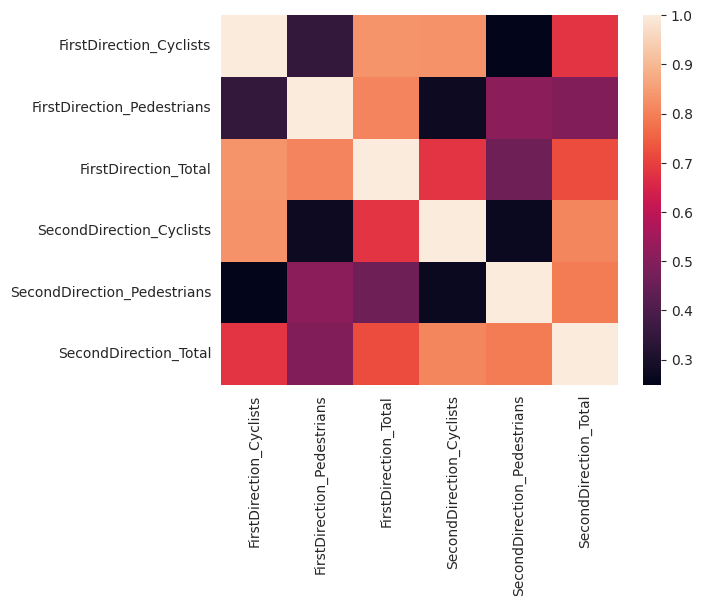

In [6]:
corr_matrix = df.loc[:, ~df.columns.isin(['ObjectId', 'ID', 'LocationId', 'Latitude', 'Longitude'])].corr()
sns.heatmap(corr_matrix)

### Random exploring

In [7]:
df['UnitId'].unique()
df_summed = df.groupby(['UnitId']).sum()
display("SUM:",df_summed[['FirstDirection_Cyclists', 'SecondDirection_Cyclists']])
df_mean = df.groupby(['UnitId']).mean()
display("MEAN:",df_mean[['FirstDirection_Cyclists', 'SecondDirection_Cyclists']])

dataset_keys = df[['UnitId', 'datum']]
dataset_keys[dataset_keys['UnitId'] == 'CAM1'].sort_values('datum').head(10)


'SUM:'

,FirstDirection_Cyclists,SecondDirection_Cyclists
UnitId,,
CAM1,63187.0,61897.0
CAM10,0.0,44951.0
CAM11,0.0,27250.0
CAM12,0.0,50199.0
CAM13,0.0,30185.0
CAM14,0.0,46931.0
CAM15,0.0,42363.0
CAM2,37199.0,35617.0
CAM3,86486.0,82802.0


'MEAN:'

,FirstDirection_Cyclists,SecondDirection_Cyclists
UnitId,,
CAM1,11.709970,11.470904
CAM10,NaN,8.217733
CAM11,NaN,4.924106
CAM12,NaN,18.886005
CAM13,NaN,15.878485
CAM14,NaN,8.528257
CAM15,NaN,8.131094
CAM2,6.860752,6.568978
CAM3,15.770605,15.098833


,UnitId,datum
25,CAM1,2021-06-20 08:00:00+00:00
316,CAM1,2021-06-20 23:00:00+00:00
367,CAM1,2021-06-21 00:00:00+00:00
119,CAM1,2021-06-21 00:59:59+00:00
386,CAM1,2021-06-21 00:59:59+00:00
405,CAM1,2021-06-21 02:00:00+00:00
138,CAM1,2021-06-21 02:00:00+00:00
424,CAM1,2021-06-21 03:00:00+00:00
157,CAM1,2021-06-21 03:00:00+00:00
41,CAM1,2021-06-21 03:59:59+00:00
